In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [154]:
df=pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [155]:
X=df[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']].values
y=df[['output']].values

In [156]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X)
X=scaler.transform(X)
X[:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=90)

## KNN

In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

ks=10
acc=np.zeros((ks-1))
for k in range(1, ks):
    neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train, np.ravel(y_train,order='C'))
    yhat=neigh.predict(X_test)
    acc[k-1]=accuracy_score(y_test, yhat)
print(acc)
print("The best accuracy is %.2f"%acc.max(),"with k=",acc.argmax()+1)

[0.73770492 0.73770492 0.80327869 0.81967213 0.81967213 0.80327869
 0.85245902 0.83606557 0.83606557]
The best accuracy is 0.85 with k= 7


## Decision Tree

In [159]:
from sklearn.tree import DecisionTreeClassifier
my_tree=DecisionTreeClassifier(criterion='gini')
my_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [149]:
yhat=my_tree.predict(X_test)

In [160]:
print("Deceision tree's accuracy : %.2f"%accuracy_score(y_test, yhat))

Deceision tree's accuracy : 0.84


In [161]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

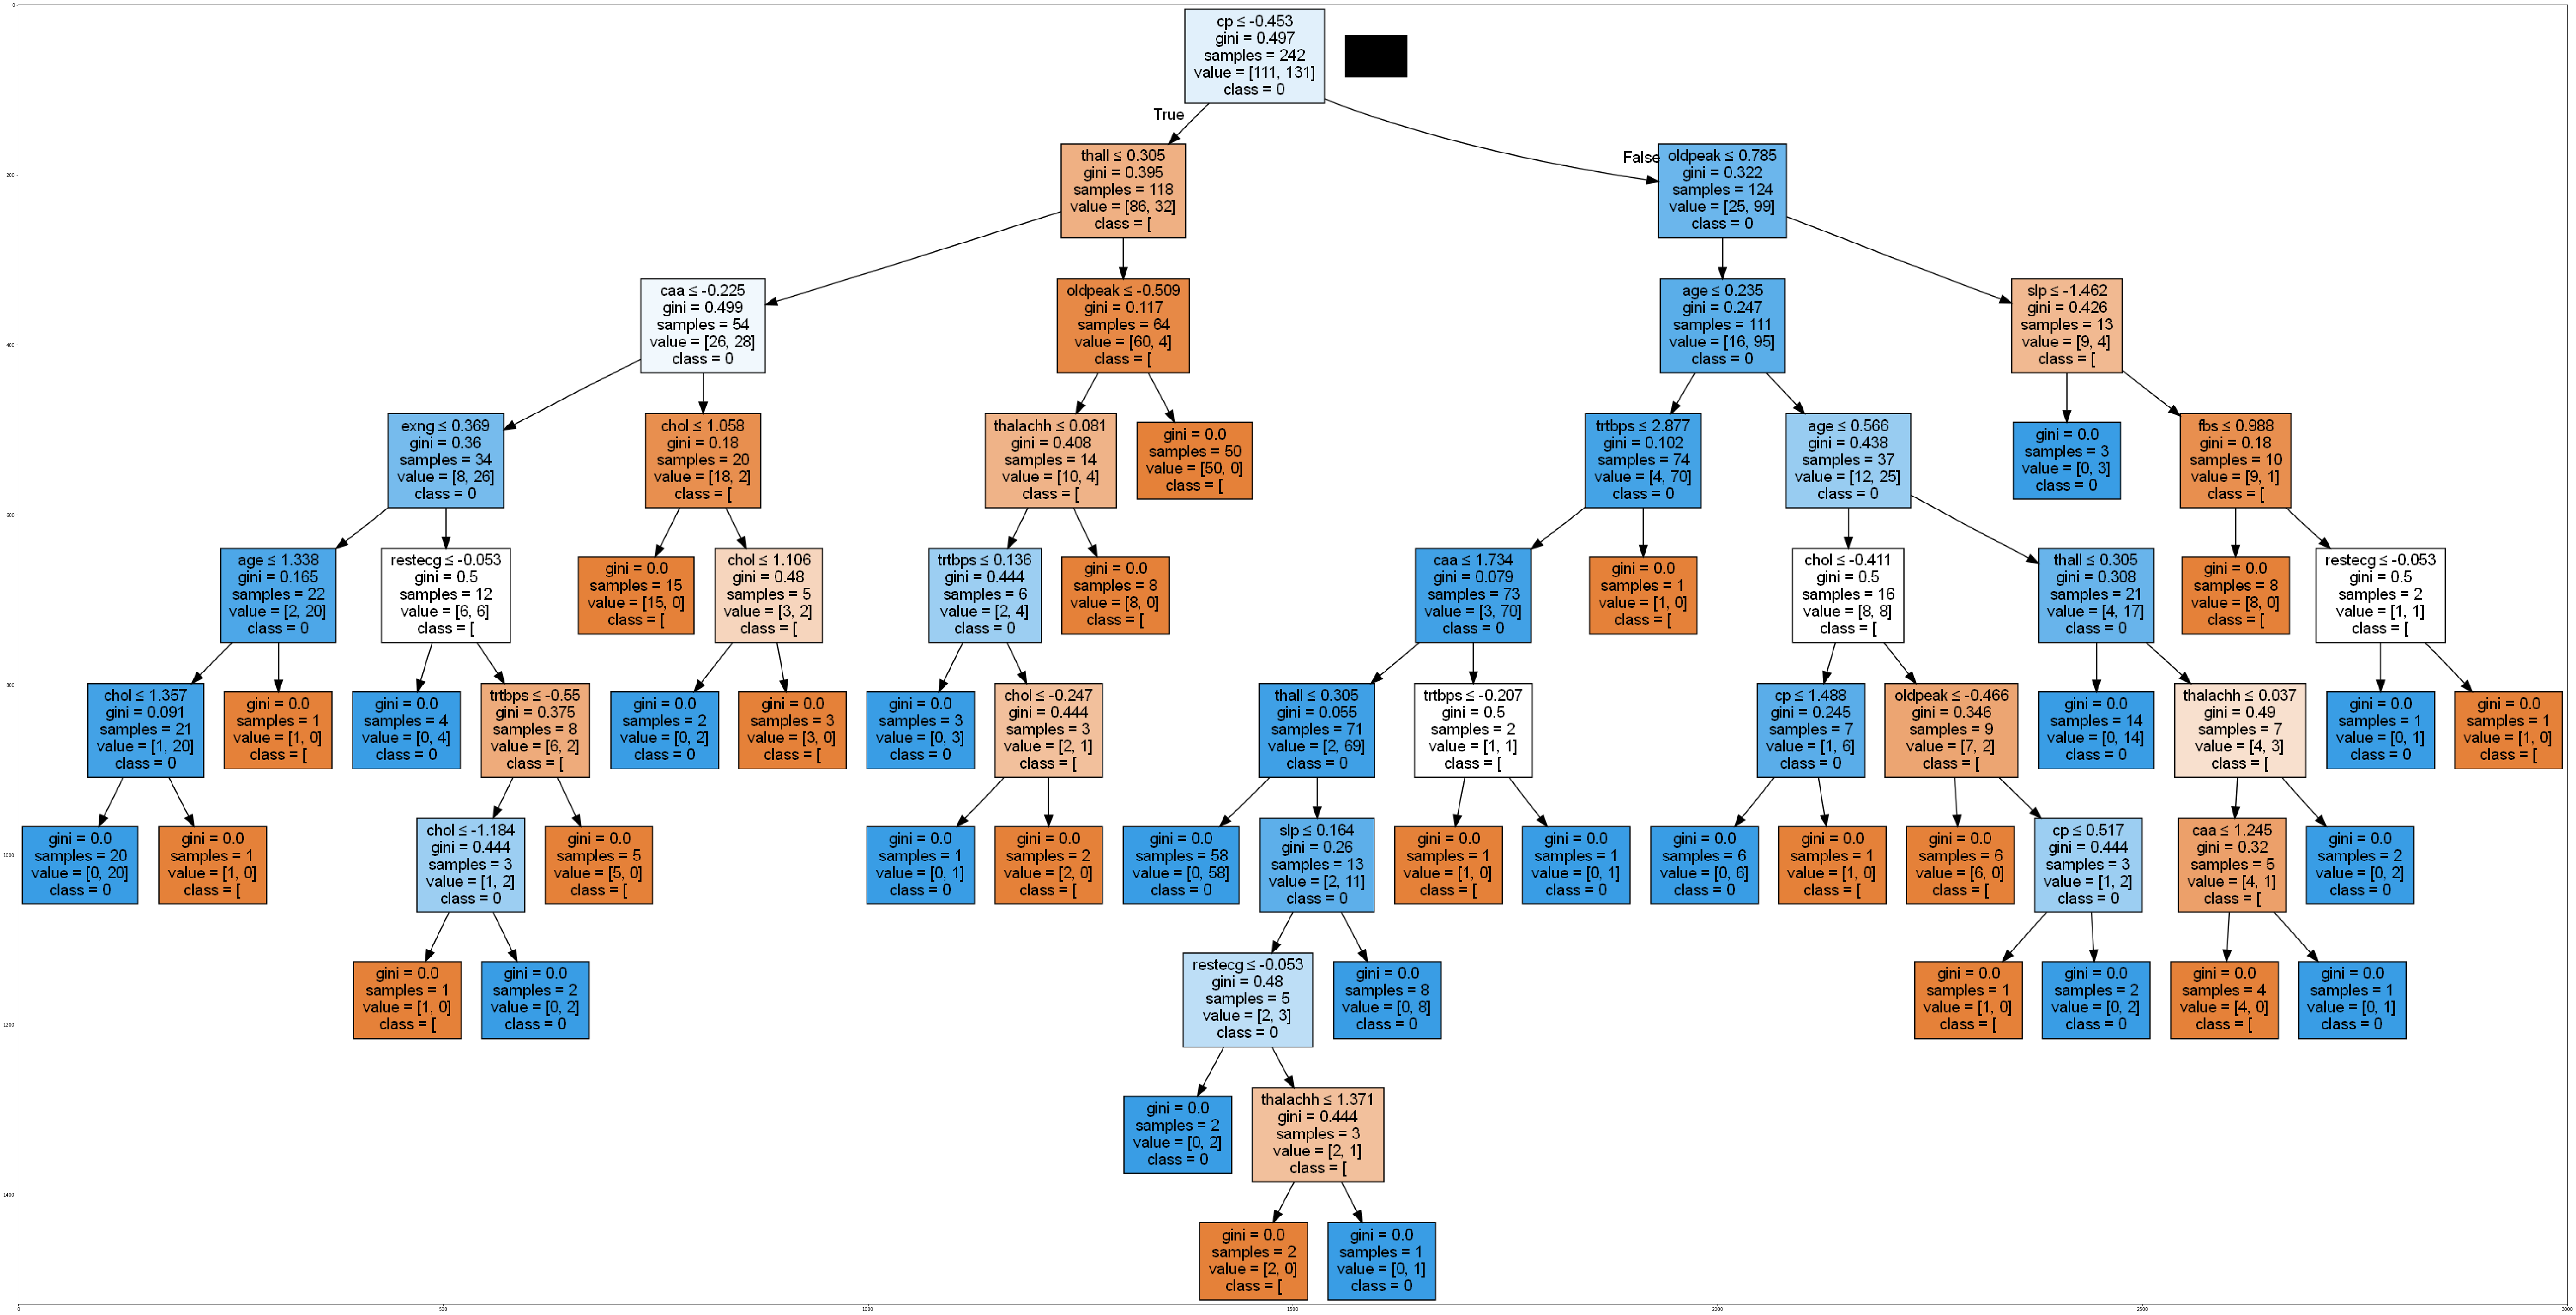

In [162]:
dot_data = StringIO()
filename = "heart.png"
featureNames = df.columns[0:13]
out=tree.export_graphviz(my_tree,feature_names=featureNames, out_file=dot_data, class_names= str(np.unique(y_train)), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## Logistic Regression

In [163]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train, np.ravel(y_train,order='C'))

LogisticRegression(C=0.01, solver='liblinear')

In [164]:
yhat=LR.predict(X_test)
yhat_pro=LR.predict_proba(X_test)

In [165]:
from sklearn.metrics import jaccard_score, log_loss, classification_report, confusion_matrix

In [166]:
jaccard_score(y_test, yhat, average='weighted')

0.5614174532207319

In [167]:
log_loss(y_test, yhat_pro)

0.5191295107942022

In [168]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.59      0.65        27
           1       0.72      0.82      0.77        34

    accuracy                           0.72        61
   macro avg       0.72      0.71      0.71        61
weighted avg       0.72      0.72      0.72        61



In [169]:
cm=confusion_matrix(y_test, yhat, labels=[1,0])
cm

array([[28,  6],
       [11, 16]], dtype=int64)

Confusion matrix, without normalization
[[28  6]
 [11 16]]


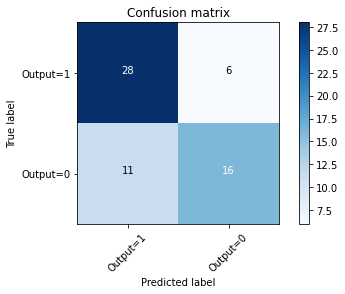

In [170]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(cm, classes=['Output=1','Output=0'],normalize= False,  title='Confusion matrix')

## SVM

In [171]:
from sklearn import svm
from sklearn.metrics import f1_score

kernels=['linear', 'poly', 'rbf', 'sigmoid']
acc=np.zeros(len(kernels))
for kernel in kernels:
    clf=svm.SVC(kernel=kernel)
    clf.fit(X_train, np.ravel(y_train,order='C'))
    yhat=clf.predict(X_test)
    acc=f1_score(y_test, yhat, average='weighted')
    print('F1_score for',kernel,': %.2f'%acc)

F1_score for linear : 0.72
F1_score for poly : 0.76
F1_score for rbf : 0.72
F1_score for sigmoid : 0.75


In [172]:
clf=svm.SVC(kernel='poly')
clf.fit(X_train, np.ravel(y_train,order='C'))

SVC(kernel='poly')

In [173]:
yhat=clf.predict(X_test)

In [174]:
jaccard_score(y_test, yhat, average='weighted')

0.6200364298724954

In [175]:
f1_score(y_test, yhat, average='weighted')

0.7626139475559891

In [176]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.84      0.59      0.70        27
           1       0.74      0.91      0.82        34

    accuracy                           0.77        61
   macro avg       0.79      0.75      0.76        61
weighted avg       0.78      0.77      0.76        61



Confusion matrix, without normalization
[[16 11]
 [ 3 31]]


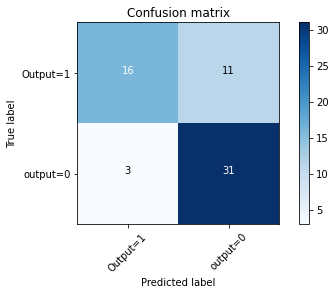

In [177]:
plot_confusion_matrix(confusion_matrix(y_test, yhat, labels=[0,1]), 
classes=['Output=1','output=0'],normalize= False,  title='Confusion matrix')